## Heart Disease Prediction - Decision Tree

#### Objective

The objective of the project is to build a model which can predict the presence of heart disease in a patient. The dataset is from Cleveland Clinic Foundation in Switzerland. It contains 14 features with 303 unique patient observation. There are total 13 independent variable with dependent variable named as a target (where 0 means no heart disease and 1 means heart disease)

#### Data Description

 
  ***age***:      displays the age of the individual.
  
  ***sex***:      Gender (1 = male ;0 = female)
  
  ***cp***:       Chest-pain type: displays the type of chest-pain experienced by the patient
                    1 = typical angina;
                    2 = atypical angina
                    3 = non — anginal pain
                    4 = asymptotic
                
  ***trestbps***:  Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
  
  ***chol***:      Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
  
  ***fbs***:       Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.If fasting blood                    sugar > 120mg/dl then :(1 = yes; 0 = no)
  
  ***restecg***:   Resting ECG : displays resting electrocardiographic results
  
                     0 = normal
                     1 = having ST-T wave abnormality
                            - can range from mild symptoms to severe problems
                            - signals non-normal heart beat
                     2 = left ventricular hyperthrophy
                         - Enlarged heart's main pumping chamber
                    
  ***thalach***:   Max heart rate achieved or displays the max heart rate achieved by an individual.
  
  ***exang***:     Exercise induced angina :(1 = yes; 0 = no)
  
  ***oldpeak***:   ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy                          heart will stress more
  
  ***slope***:     the slope of the peak exercise ST segment
                     0: Upsloping: better heart rate with excercise (uncommon)
                     1: Flatsloping: minimal change (typical healthy heart)
                     2: Downslopins: signs of unhealthy heart

  ***ca***:         number of major vessels (0-3) colored by flourosopy
                      - colored vessel means the doctor can see the blood passing through
                      - the more blood movement the better (no clots)
                  
  ***thal***:       thalium stress result
  
  ***target***:     have disease or not (1=yes, 0=no) (= the predicted attribute)

In [93]:
# import necessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Load the dataset

In [94]:
df = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Course_3_Machine_Learning_2\Decision Tree\heart_k.csv")

In [95]:
df.shape

(303, 14)

#### Inspecting the Dataframe

In [96]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


It can be seen there are no null values present in the dataset

#### Model Building and Evalution

First let us build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [99]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [100]:
# Putting feature variable to X
X = df.drop('target',axis=1)

# Putting response variable to y
y = df['target']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (212, 13)
X_test: (91, 13)
y_train: (212,)
y_test: (91,)


In [102]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [103]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [104]:
# Let's check the evaluation metrics of the default model
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [105]:
# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71        32
           1       0.88      0.75      0.81        59

    accuracy                           0.77        91
   macro avg       0.76      0.78      0.76        91
weighted avg       0.79      0.77      0.77        91



In [106]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[26  6]
 [15 44]]
0.7692307692307693


#### Plotting the Decision Tree

We require library pydot and software graphviz to visualize the decision tree

In [107]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[1:])
features

['sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

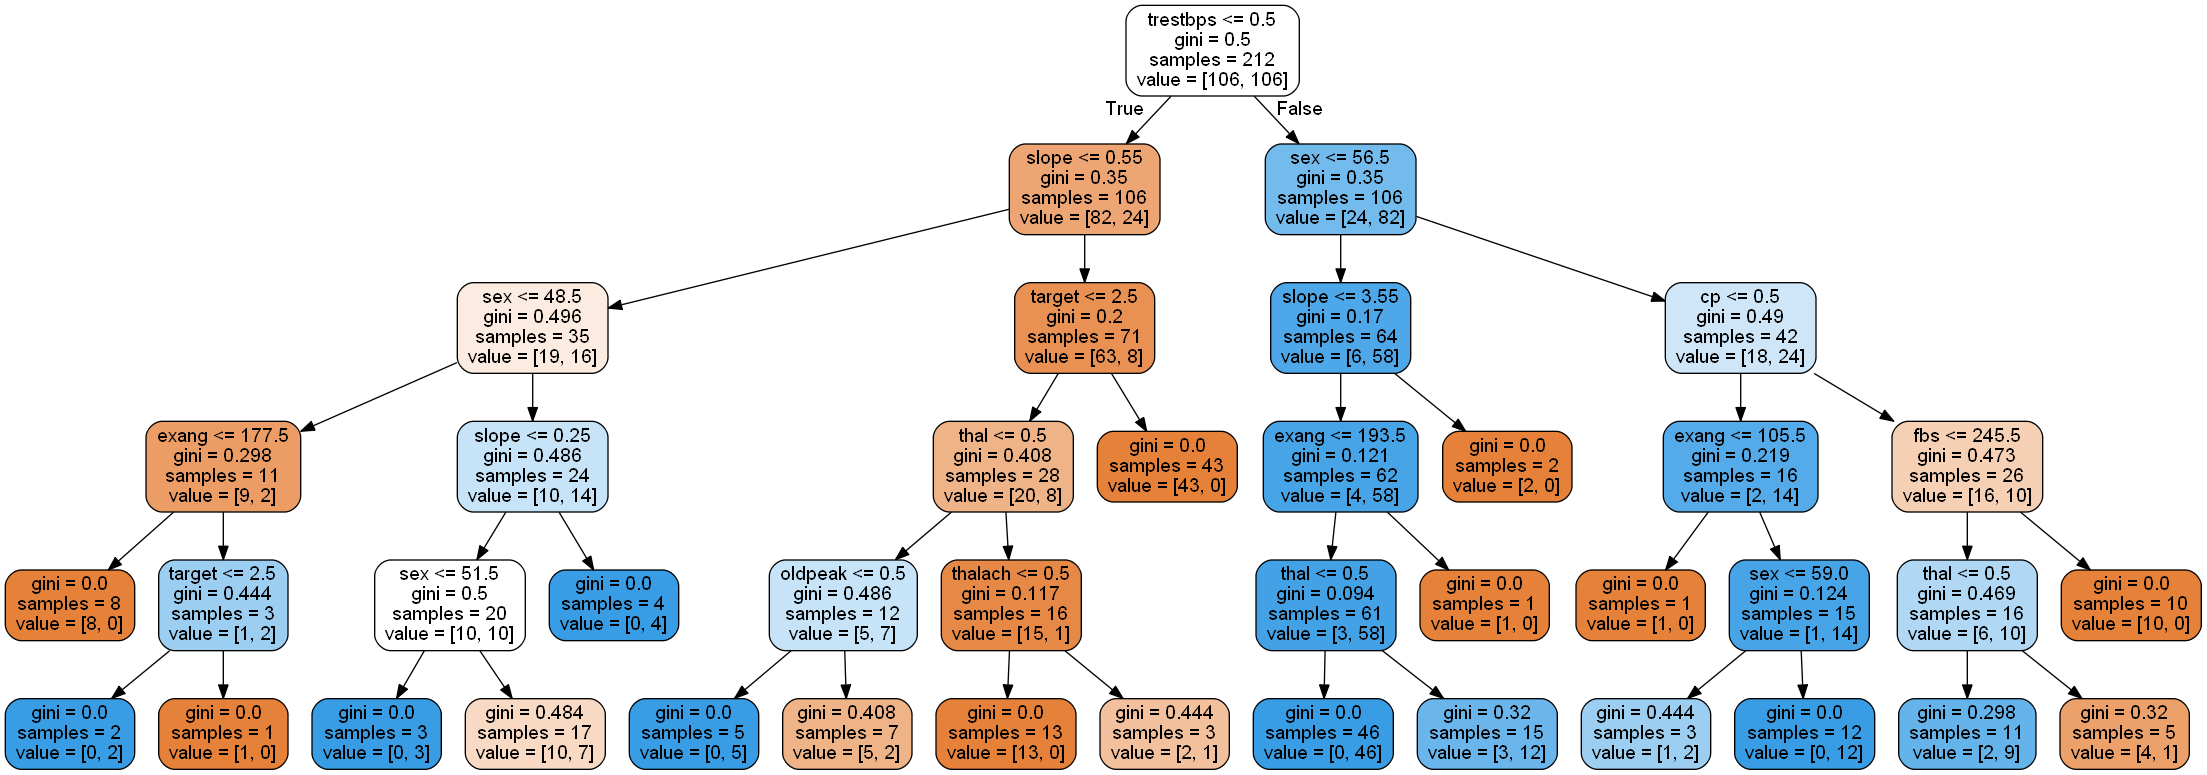

In [108]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Hyper Parameter Tuning
 -max_depth

In [109]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [110]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002192,7.388879e-04,0.000998,0.000004,1,{'max_depth': 1},0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1,0.786982,0.786982,0.770588,0.752941,0.770588,0.773616,0.012674
1,0.002400,4.844515e-04,0.000990,0.000013,2,{'max_depth': 2},0.674419,0.674419,0.785714,0.738095,0.785714,0.731672,0.049876,38,0.804734,0.804734,0.770588,0.764706,0.770588,0.783070,0.017818
2,0.002395,4.907655e-04,0.001007,0.000013,3,{'max_depth': 3},0.627907,0.744186,0.690476,0.738095,0.714286,0.702990,0.042074,39,0.863905,0.857988,0.888235,0.835294,0.829412,0.854967,0.021147
3,0.002194,3.989697e-04,0.000000,0.000000,4,{'max_depth': 4},0.651163,0.744186,0.738095,0.785714,0.761905,0.736213,0.045631,37,0.911243,0.893491,0.917647,0.888235,0.900000,0.902123,0.010918
4,0.001995,2.132481e-07,0.000798,0.000399,5,{'max_depth': 5},0.627907,0.767442,0.761905,0.833333,0.833333,0.764784,0.075032,2,0.952663,0.964497,0.970588,0.923529,0.929412,0.948138,0.018700


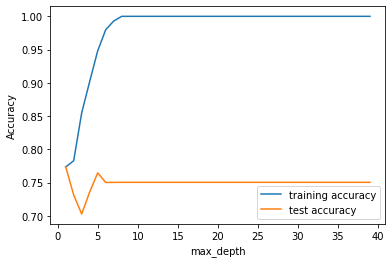

In [111]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

An interesting pattern can be seen here. Train dataset's accuracy gradually increased along with increased max_depth and reached at the top which shows the overfitted model. However, for test dataset, accuracy drops in between and again rises ar max_depth = 5. However, it does not increases henceforth

 - Min_samples_leaf

In [112]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [113]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000998,0.001262,0.000399,0.000488,5,{'min_samples_leaf': 5},0.651163,0.790698,0.785714,0.833333,0.833333,0.778848,0.066975,1,0.893491,0.887574,0.894118,0.888235,0.882353,0.889154,0.004314
1,0.001998,0.001096,0.000399,0.000488,25,{'min_samples_leaf': 25},0.720930,0.720930,0.785714,0.738095,0.785714,0.750277,0.029606,4,0.786982,0.786982,0.770588,0.764706,0.770588,0.775969,0.009245
2,0.001991,0.000011,0.000600,0.000490,45,{'min_samples_leaf': 45},0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,2,0.786982,0.786982,0.770588,0.752941,0.770588,0.773616,0.012674
3,0.001820,0.000413,0.000596,0.000487,65,{'min_samples_leaf': 65},0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,2,0.786982,0.786982,0.770588,0.752941,0.770588,0.773616,0.012674
4,0.000000,0.000000,0.006259,0.012518,85,{'min_samples_leaf': 85},0.488372,0.488372,0.571429,0.857143,0.714286,0.623920,0.142871,5,0.502959,0.502959,0.576471,0.752941,0.682353,0.603536,0.099497


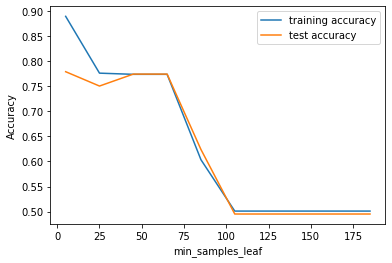

In [114]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 - min_samples_split

In [115]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score = True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [116]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002594,0.001199,0.000800,3.999014e-04,5,{'min_samples_split': 5},0.627907,0.813953,0.714286,0.785714,0.857143,0.759801,0.080681,5,0.976331,0.982249,0.976471,0.964706,0.952941,0.970540,0.010484
1,0.002182,0.000394,0.000799,3.999520e-04,25,{'min_samples_split': 25},0.627907,0.697674,0.690476,0.761905,0.714286,0.698450,0.043169,9,0.846154,0.840237,0.888235,0.841176,0.829412,0.849043,0.020343
2,0.001800,0.000401,0.000600,4.901854e-04,45,{'min_samples_split': 45},0.651163,0.674419,0.785714,0.761905,0.785714,0.731783,0.057471,7,0.816568,0.804734,0.788235,0.776471,0.782353,0.793672,0.014833
3,0.002787,0.000745,0.000997,9.368364e-07,65,{'min_samples_split': 65},0.674419,0.674419,0.785714,0.738095,0.785714,0.731672,0.049876,8,0.804734,0.804734,0.770588,0.764706,0.770588,0.783070,0.017818
4,0.003337,0.006157,0.000000,0.000000e+00,85,{'min_samples_split': 85},0.720930,0.674419,0.785714,0.738095,0.785714,0.740975,0.042055,6,0.786982,0.804734,0.770588,0.764706,0.770588,0.779520,0.014632


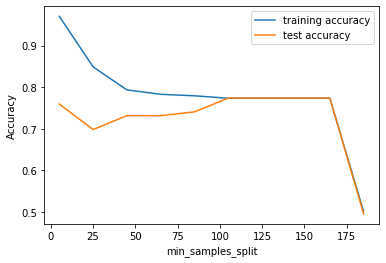

In [117]:

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Grid Search to Find Optimal Hyperparameters

In [118]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [119]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002200,0.001163,0.000798,0.000399,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1
1,0.001400,0.000490,0.000796,0.000398,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1
2,0.001604,0.000496,0.000793,0.000396,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.488372,0.488372,0.500000,0.500000,0.500000,0.495349,0.005696,9
3,0.000491,0.000618,0.000200,0.000400,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.488372,0.488372,0.500000,0.500000,0.500000,0.495349,0.005696,9
4,0.000000,0.000000,0.003125,0.006249,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1
5,0.003130,0.006261,0.000000,0.000000,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1
6,0.000000,0.000000,0.000000,0.000000,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.488372,0.488372,0.500000,0.500000,0.500000,0.495349,0.005696,9
7,0.000000,0.000000,0.000000,0.000000,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.488372,0.488372,0.500000,0.500000,0.500000,0.495349,0.005696,9
8,0.003131,0.006263,0.000000,0.000000,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1
9,0.000000,0.000000,0.003123,0.006246,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.720930,0.720930,0.785714,0.857143,0.785714,0.774086,0.050636,1


In [120]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)

best accuracy 0.7740863787375415


In [121]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [122]:
# Best Model with prescibed  optimal hyperparameter obtained from grid search
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [123]:
# accuracy score
clf_gini.score(X_test,y_test)

0.7252747252747253

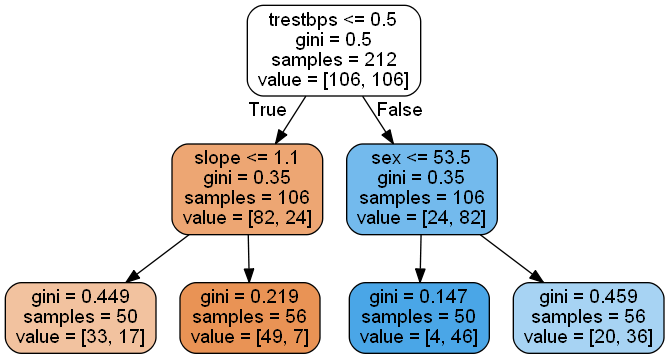

In [124]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [125]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64        32
           1       0.81      0.75      0.78        59

    accuracy                           0.73        91
   macro avg       0.70      0.72      0.71        91
weighted avg       0.74      0.73      0.73        91



In [126]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[22 10]
 [15 44]]


In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
from sklearn import metrics

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred, drop_intermediate = False )

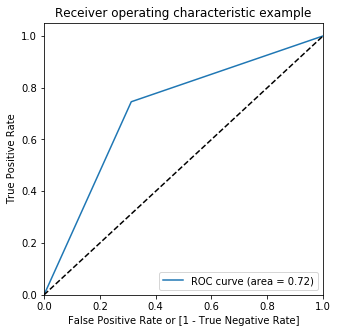

In [132]:
draw_roc( y_test, y_pred)

#### ROC  curve and area under the curve

In [133]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [134]:
auc = auc_val(fpr,tpr)
auc

0.7166313559322034

an AUC can be classified as mentioned below,

 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail

Hence the model doing a fair job